In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/My Drive/Association Rule Mining

/content/drive/My Drive/Association Rule Mining


In [0]:
'''importing libraries and dependancies'''
import pandas as pd
import os
import sys
from matplotlib import style
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
from Apriori_core import apriori

In [0]:
'''Taking all kinds of input required'''
mini = int(input("Enter the minimum for list : "))
rulesMin = float(input("Enter the minimum percentage for rules (0-1): "))
subjects = int(input("Enter the number of subjects that you want to take good/bad (Max 10) : "))

In [0]:
'''Creating the datasets'''
dataCoreGood = pd.read_csv("DataCoreGood.csv")
dataCoreBad  =pd.read_csv("DataCoreBad.csv")
dataCoreTheoryGood  =pd.read_csv("DataCoreTheoryGood.csv")
dataCoreTheoryBad  =pd.read_csv("DataCoreTheoryBad.csv")
dataOtherGood  =pd.read_csv("DataOtherGood.csv")
dataOtherBad  =pd.read_csv("DataOtherBad.csv")
dataOtherTheoryGood  =pd.read_csv("DataOtherTheoryGood.csv")
dataOtherTheoryBad  =pd.read_csv("DataOtherTheoryBad.csv")

In [0]:
DATABASENAMES = ['DCG','DCB','DCTG','DCTB','DOG','DOB','DOTG','DOTB']

In [0]:
'''Adding all databases in a list of databases'''
DATABASES = []
DATABASES.append(dataCoreGood)
DATABASES.append(dataCoreBad)
DATABASES.append(dataCoreTheoryGood)
DATABASES.append(dataCoreTheoryBad)
DATABASES.append(dataOtherGood)
DATABASES.append(dataOtherBad)
DATABASES.append(dataOtherTheoryGood)
DATABASES.append(dataOtherTheoryBad)

['CS492', 'CS693']=>['CS593']: 92.0%
['CS493', 'CS391', 'CS492']=>['CS491']: 92.0%
['CS391', 'CS392', 'CS692']=>['CS291']: 90.9090909090909%
['CS391', 'CS491', 'CS593']=>['CS291']: 90.19607843137256%
['CS291', 'CS491', 'CS393']=>['CS391']: 91.42857142857143%
['CS391', 'CS492', 'CS592']=>['CS291']: 91.30434782608695%
['CS391', 'CS492', 'CS393']=>['CS491']: 90.0%
['CS493', 'CS391', 'CS392', 'CS492']=>['CS491']: 90.9090909090909%
['CS493', 'CS392', 'CS491', 'CS593']=>['CS492']: 95.23809523809523%
['CS291', 'CS392', 'M(CS)491', 'CS593']=>['CS391']: 90.0%
['CS391', 'CS392', 'M(CS)491', 'CS593']=>['CS291']: 90.0%
['CS291', 'CS392', 'CS491', 'CS593']=>['CS391']: 91.8918918918919%
['CS291', 'M(CS)491', 'CS491', 'CS593']=>['CS391']: 93.33333333333333%
['CS291', 'CS491', 'CS593', 'CS393']=>['CS391']: 96.15384615384616%
['CS391', 'CS491', 'CS593', 'CS591']=>['CS291']: 92.0%
['CS391', 'CS492', 'CS593', 'CS591']=>['CS291']: 91.66666666666666%
['CS392', 'M(CS)491', 'CS491', 'CS593']=>['CS391']: 92.3

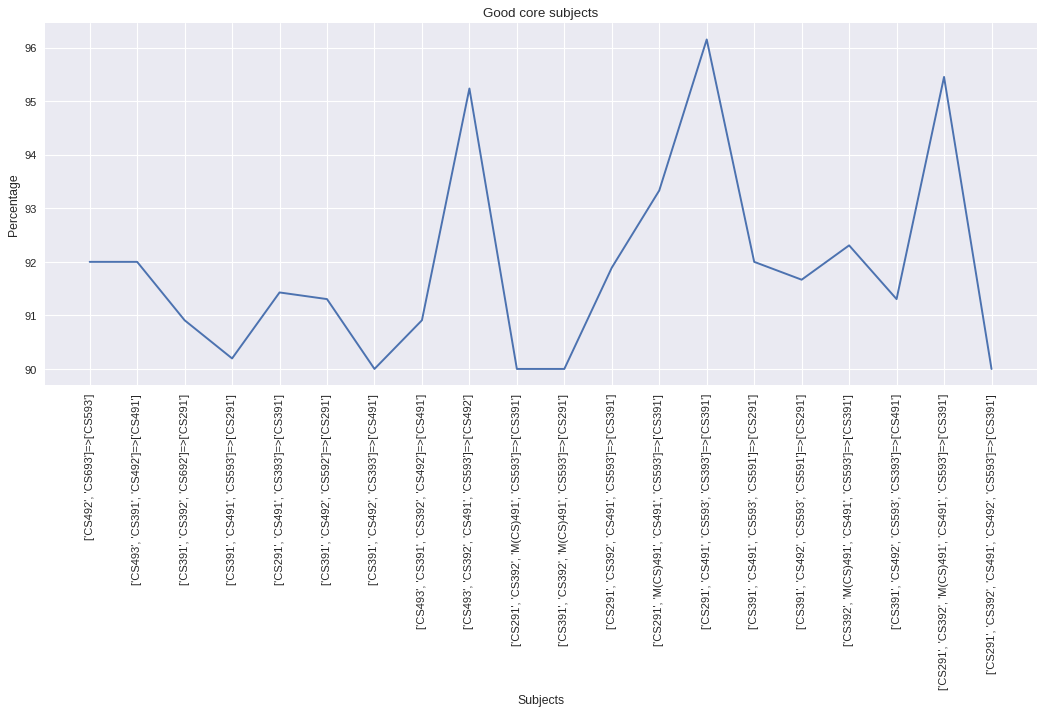

In [56]:
'''Loading data in transaction = *data* format'''
dataCoreGood.name = 'Good core subjects'

data = {}
SUBJECTS = []
for indexes in dataCoreGood.index:
  marks = []
  for i in range (0,10):
    marks.append(dataCoreGood.loc[indexes][str(i)])
  data[dataCoreGood.loc[indexes]['Unnamed: 0']] = marks
  for indi_subs in marks:
    if(indi_subs not in SUBJECTS):
      SUBJECTS.append(indi_subs)

object = apriori(min = 20 ,transactions = data, productlist = SUBJECTS, rulesMin = rulesMin)
x_axis = []
y_axis = []
for elements in object.finalRules:
  for i in object.finalRules[elements]:
    print(i)
    a,b = i.split(":")
    x_axis.append(a)
    y_axis.append(float(b[1:len(b)-1]))
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_axis,y_axis)
plt.title(dataCoreGood.name)
plt.xlabel('Subjects')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()
  
    
  #print(data)
  #   for students in databases.index:
#     print(students)

['CS201']=>['CS301']: 98.4126984126984%
['CS301']=>['CS303']: 98.1981981981982%
['CS303']=>['CS301']: 99.0909090909091%
['CS604A/ CS604B']=>['CS301']: 98.73417721518987%
['CS302']=>['CS301']: 98.59154929577466%
['CS503']=>['CS301']: 98.52941176470588%
['CS401']=>['CS301']: 100.0%
['CS402']=>['CS301']: 100.0%
['CS602']=>['CS301']: 100.0%
['CS403']=>['CS301']: 98.95833333333334%
['CS502']=>['CS301']: 98.4126984126984%
['CS201']=>['CS303']: 98.4126984126984%
['CS604A/ CS604B']=>['CS303']: 97.46835443037975%
['CS302']=>['CS303']: 98.59154929577466%
['CS503']=>['CS303']: 100.0%
['M(CS)401']=>['CS303']: 100.0%
['CS401']=>['CS303']: 98.57142857142858%
['CS402']=>['CS303']: 100.0%
['CS602']=>['CS303']: 96.66666666666667%
['CS403']=>['CS303']: 98.95833333333334%
['CS502']=>['CS303']: 96.82539682539682%
['CS201']=>['CS301', 'CS303']: 96.82539682539682%
['CS301', 'CS201']=>['CS303']: 98.38709677419355%
['CS201', 'CS303']=>['CS301']: 98.38709677419355%
['CS201', 'CS403']=>['CS301']: 98.07692307692

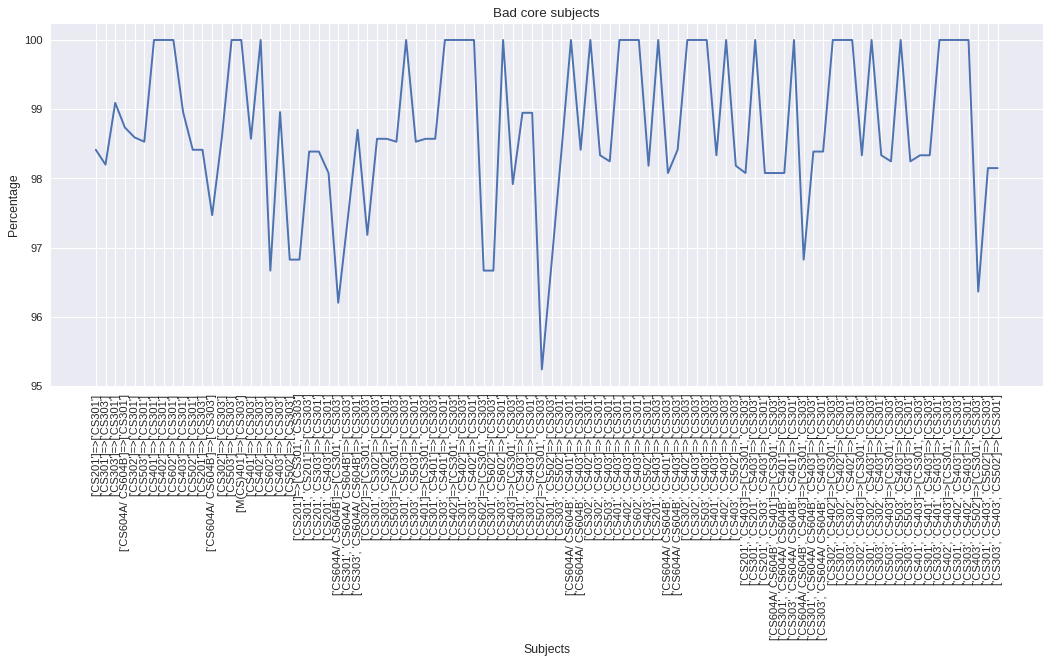

In [59]:
'''Loading data in transaction = *data* format'''
dataCoreBad.name = 'Bad core subjects'

data = {}
SUBJECTS = []
for indexes in dataCoreBad.index:
  marks = []
  for i in range (0,10):
    marks.append(dataCoreBad.loc[indexes][str(i)])
  data[dataCoreBad.loc[indexes]['Unnamed: 0']] = marks
  for indi_subs in marks:
    if(indi_subs not in SUBJECTS):
      SUBJECTS.append(indi_subs)

object = apriori(min = 50 ,transactions = data, productlist = SUBJECTS, rulesMin = rulesMin)
x_axis = []
y_axis = []
for elements in object.finalRules:
  for i in object.finalRules[elements]:
    print(i)
    a,b = i.split(":")
    x_axis.append(a)
    y_axis.append(float(b[1:len(b)-1]))
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_axis,y_axis)
plt.title(dataCoreBad.name)
plt.xlabel('Subjects')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

['CS401', 'CS302']=>['M(CS)401']: 90.32258064516128%
['CS502', 'CS605A']=>['M(CS)401']: 90.19607843137256%
['CS502', 'CS201']=>['M(CS)401']: 90.9090909090909%
['CS401', 'CS504D']=>['CS501']: 91.66666666666666%
['CS401', 'CS302']=>['CS201']: 91.93548387096774%
['CS402', 'CS504D']=>['CS501']: 90.74074074074075%
['CS402', 'CS605A']=>['CS302']: 91.48936170212765%
['CS403', 'CS504D']=>['CS501']: 97.5609756097561%
['CS502', 'CS605A']=>['CS302']: 92.15686274509804%
['CS605A', 'CS201']=>['CS302']: 91.54929577464789%
['M(CS)401', 'CS401', 'CS504D']=>['CS501']: 90.56603773584906%
['CS401', 'CS605A', 'CS201']=>['M(CS)401']: 90.0%
['M(CS)401', 'CS401', 'CS302']=>['CS201']: 92.85714285714286%
['CS401', 'CS302', 'CS201']=>['M(CS)401']: 91.22807017543859%
['M(CS)401', 'CS402', 'CS504D']=>['CS501']: 90.9090909090909%
['M(CS)401', 'CS502', 'CS605A']=>['CS302']: 91.30434782608695%
['M(CS)401', 'CS502', 'CS201']=>['CS302']: 90.0%
['CS502', 'CS302', 'CS201']=>['M(CS)401']: 91.83673469387756%
['M(CS)401', 

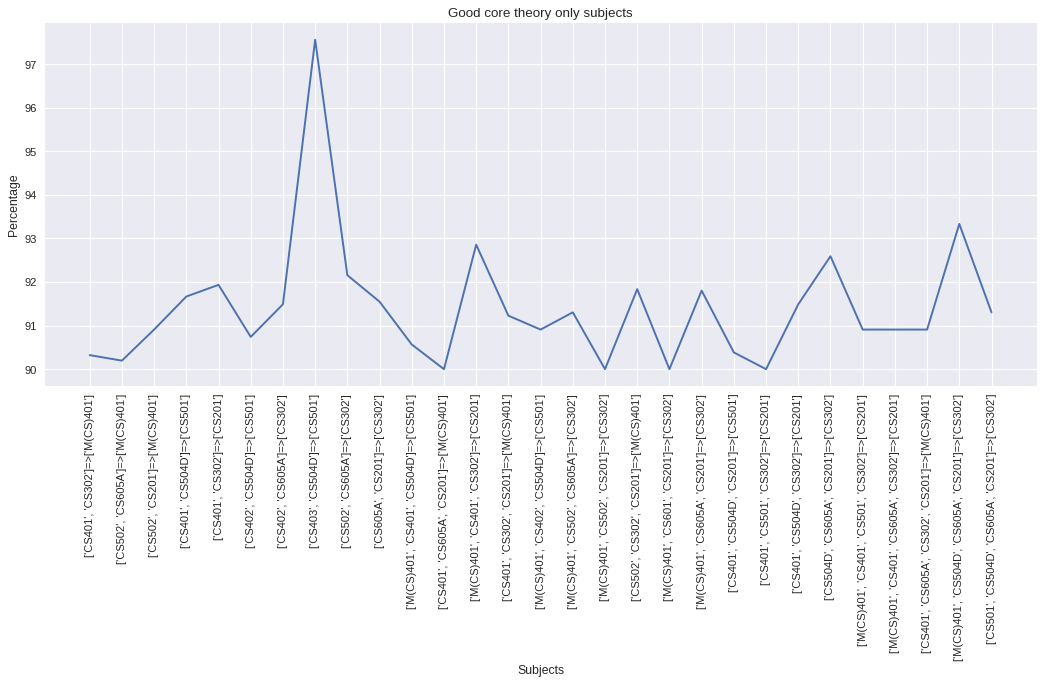

In [61]:
'''Loading data in transaction = *data* format'''
dataCoreTheoryGood.name = 'Good core theory only subjects'

data = {}
SUBJECTS = []
for indexes in dataCoreTheoryGood.index:
  marks = []
  for i in range (0,10):
    marks.append(dataCoreTheoryGood.loc[indexes][str(i)])
  data[dataCoreTheoryGood.loc[indexes]['Unnamed: 0']] = marks
  for indi_subs in marks:
    if(indi_subs not in SUBJECTS):
      SUBJECTS.append(indi_subs)

object = apriori(min = 40,transactions = data, productlist = SUBJECTS, rulesMin = rulesMin)
x_axis = []
y_axis = []
for elements in object.finalRules:
  for i in object.finalRules[elements]:
    print(i)
    a,b = i.split(":")
    x_axis.append(a)
    y_axis.append(float(b[1:len(b)-1]))
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_axis,y_axis)
plt.title(dataCoreTheoryGood.name)
plt.xlabel('Subjects')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

['CS301']=>['CS303']: 99.10714285714286%
['CS303']=>['CS301']: 100.0%
['CS604A/ CS604B']=>['CS301']: 100.0%
['CS402']=>['CS301']: 100.0%
['CS301']=>['CS403']: 91.07142857142857%
['CS403']=>['CS301']: 100.0%
['CS604A/ CS604B']=>['CS303']: 98.76543209876543%
['CS402']=>['CS303']: 100.0%
['CS303']=>['CS403']: 90.990990990991%
['CS403']=>['CS303']: 99.01960784313727%
['CS604A/ CS604B']=>['CS301', 'CS303']: 98.76543209876543%
['CS301', 'CS604A/ CS604B']=>['CS303']: 98.76543209876543%
['CS303', 'CS604A/ CS604B']=>['CS301']: 100.0%
['CS402']=>['CS301', 'CS303']: 100.0%
['CS301', 'CS402']=>['CS303']: 100.0%
['CS303', 'CS402']=>['CS301']: 100.0%
['CS301']=>['CS303', 'CS403']: 90.17857142857143%
['CS303']=>['CS301', 'CS403']: 90.990990990991%
['CS403']=>['CS301', 'CS303']: 99.01960784313727%
['CS301', 'CS303']=>['CS403']: 90.990990990991%
['CS301', 'CS403']=>['CS303']: 99.01960784313727%
['CS303', 'CS403']=>['CS301']: 100.0%


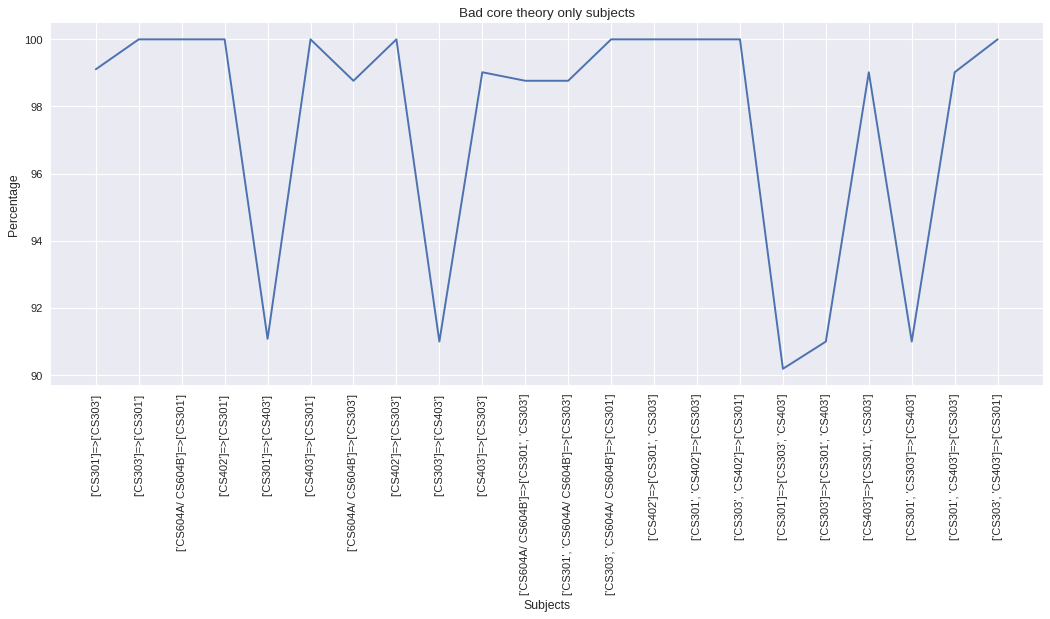

In [64]:
'''Loading data in transaction = *data* format'''
dataCoreTheoryBad.name = 'Bad core theory only subjects'

data = {}
SUBJECTS = []
for indexes in dataCoreTheoryBad.index:
  marks = []
  for i in range (0,10):
    marks.append(dataCoreTheoryBad.loc[indexes][str(i)])
  data[dataCoreTheoryBad.loc[indexes]['Unnamed: 0']] = marks
  for indi_subs in marks:
    if(indi_subs not in SUBJECTS):
      SUBJECTS.append(indi_subs)

object = apriori(min = 75,transactions = data, productlist = SUBJECTS, rulesMin = rulesMin)
x_axis = []
y_axis = []
for elements in object.finalRules:
  for i in object.finalRules[elements]:
    print(i)
    a,b = i.split(":")
    x_axis.append(a)
    y_axis.append(float(b[1:len(b)-1]))
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_axis,y_axis)
plt.title(dataCoreTheoryBad.name)
plt.xlabel('Subjects')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

['ES291']=>['HU481']: 97.32142857142857%
['HU481']=>['ES291']: 100.0%
['ES291']=>['CH291']: 96.42857142857143%
['CH291']=>['ES291']: 100.0%
['ES291']=>['ME291']: 93.75%
['ME291']=>['ES291']: 100.0%
['HU481']=>['CH291']: 96.3302752293578%
['CH291']=>['HU481']: 97.22222222222221%
['HU481']=>['ME291']: 93.57798165137615%
['ME291']=>['HU481']: 97.14285714285714%
['CH291']=>['ME291']: 95.37037037037037%
['ME291']=>['CH291']: 98.09523809523809%
['ES291']=>['HU481', 'CH291']: 93.75%
['HU481']=>['ES291', 'CH291']: 96.3302752293578%
['CH291']=>['ES291', 'HU481']: 97.22222222222221%
['ES291', 'HU481']=>['CH291']: 96.3302752293578%
['ES291', 'CH291']=>['HU481']: 97.22222222222221%
['HU481', 'CH291']=>['ES291']: 100.0%
['ES291']=>['HU481', 'ME291']: 91.07142857142857%
['HU481']=>['ES291', 'ME291']: 93.57798165137615%
['ME291']=>['ES291', 'HU481']: 97.14285714285714%
['ES291', 'HU481']=>['ME291']: 93.57798165137615%
['ES291', 'ME291']=>['HU481']: 97.14285714285714%
['HU481', 'ME291']=>['ES291']: 10

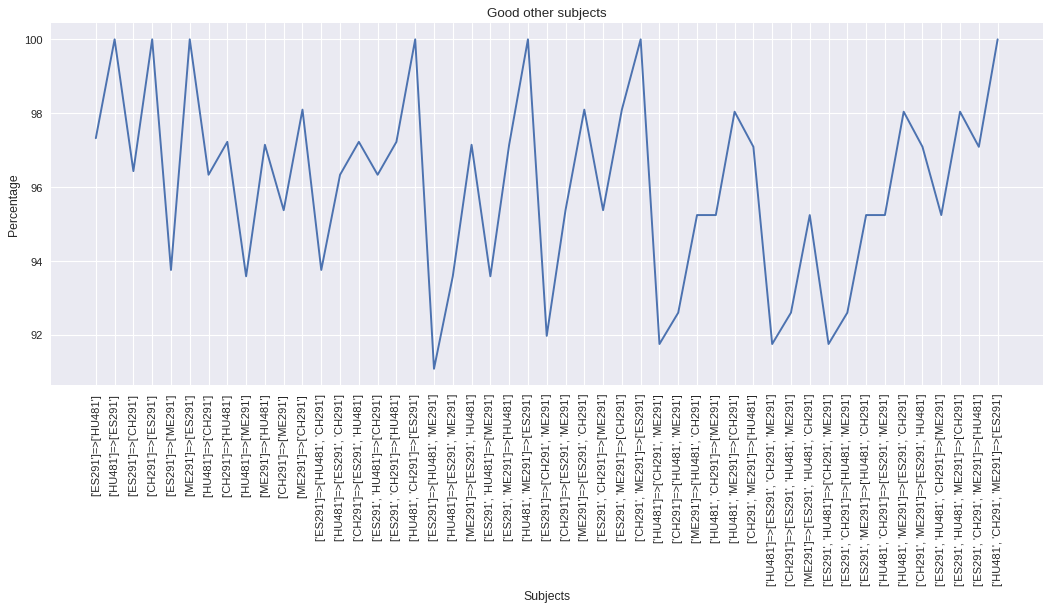

In [66]:
'''Loading data in transaction = *data* format'''
dataOtherGood.name = 'Good other subjects'

data = {}
SUBJECTS = []
for indexes in dataOtherGood.index:
  marks = []
  for i in range (0,10):
    marks.append(dataOtherGood.loc[indexes][str(i)])
  data[dataOtherGood.loc[indexes]['Unnamed: 0']] = marks
  for indi_subs in marks:
    if(indi_subs not in SUBJECTS):
      SUBJECTS.append(indi_subs)

object = apriori(min = 100,transactions = data, productlist = SUBJECTS, rulesMin = rulesMin)
x_axis = []
y_axis = []
for elements in object.finalRules:
  for i in object.finalRules[elements]:
    print(i)
    a,b = i.split(":")
    x_axis.append(a)
    y_axis.append(float(b[1:len(b)-1]))
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_axis,y_axis)
plt.title(dataOtherGood.name)
plt.xlabel('Subjects')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

['ME201']=>['PH301']: 93.51851851851852%
['PH301']=>['ME201']: 96.19047619047619%
['ME201']=>['CH201']: 99.07407407407408%
['CH201']=>['ME201']: 96.3963963963964%
['ME201']=>['ES201']: 99.07407407407408%
['ES201']=>['ME201']: 96.3963963963964%
['PH301']=>['CH201']: 99.04761904761905%
['CH201']=>['PH301']: 93.69369369369369%
['PH301']=>['ES201']: 99.04761904761905%
['ES201']=>['PH301']: 93.69369369369369%
['CH201']=>['ES201']: 99.09909909909909%
['ES201']=>['CH201']: 99.09909909909909%
['ME201']=>['PH301', 'CH201']: 92.5925925925926%
['PH301']=>['ME201', 'CH201']: 95.23809523809523%
['CH201']=>['ME201', 'PH301']: 90.09009009009009%
['ME201', 'PH301']=>['CH201']: 99.00990099009901%
['ME201', 'CH201']=>['PH301']: 93.45794392523365%
['PH301', 'CH201']=>['ME201']: 96.15384615384616%
['ME201']=>['PH301', 'ES201']: 92.5925925925926%
['PH301']=>['ME201', 'ES201']: 95.23809523809523%
['ES201']=>['ME201', 'PH301']: 90.09009009009009%
['ME201', 'PH301']=>['ES201']: 99.00990099009901%
['ME201', 'E

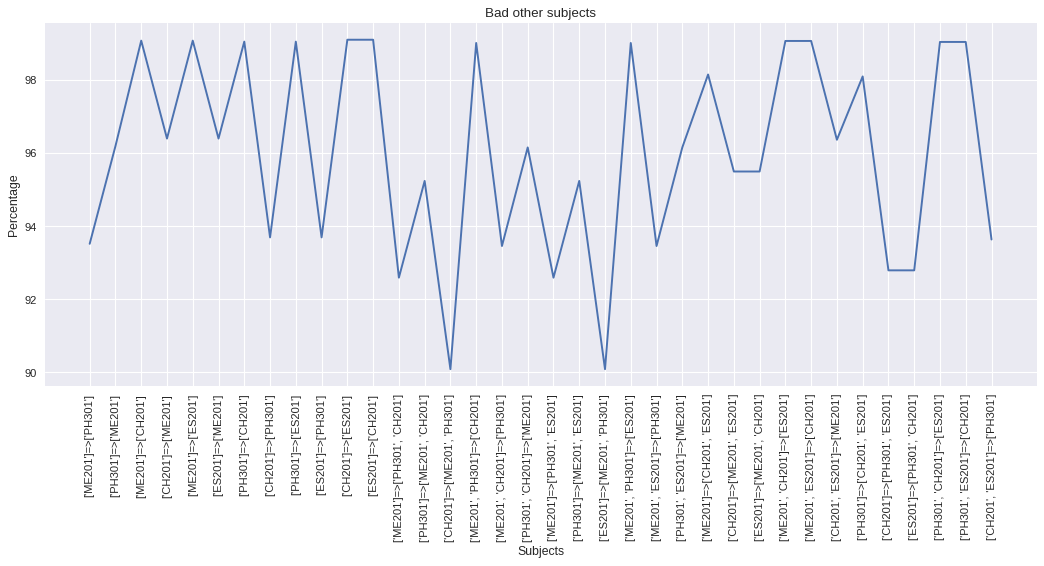

In [67]:
'''Loading data in transaction = *data* format'''
dataOtherBad.name = 'Bad other subjects'

data = {}
SUBJECTS = []
for indexes in dataOtherBad.index:
  marks = []
  for i in range (0,10):
    marks.append(dataOtherBad.loc[indexes][str(i)])
  data[dataOtherBad.loc[indexes]['Unnamed: 0']] = marks
  for indi_subs in marks:
    if(indi_subs not in SUBJECTS):
      SUBJECTS.append(indi_subs)

object = apriori(min = 100,transactions = data, productlist = SUBJECTS, rulesMin = rulesMin)
x_axis = []
y_axis = []
for elements in object.finalRules:
  for i in object.finalRules[elements]:
    print(i)
    a,b = i.split(":")
    x_axis.append(a)
    y_axis.append(float(b[1:len(b)-1]))
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_axis,y_axis)
plt.title(dataOtherBad.name)
plt.xlabel('Subjects')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

In [12]:
'''Loading data in transaction = *data* format'''
dataOtherTheoryGood.name = 'Good other theory only subjects'

data = {}
SUBJECTS = []
for indexes in dataOtherTheoryGood.index:
  marks = []
  for i in range (0,10):
    marks.append(dataOtherTheoryGood.loc[indexes][str(i)])
  data[dataOtherTheoryGood.loc[indexes]['Unnamed: 0']] = marks
  for indi_subs in marks:
    if(indi_subs not in SUBJECTS):
      SUBJECTS.append(indi_subs)

object = apriori(min = 112,transactions = data, productlist = SUBJECTS, rulesMin = 0.9)
x_axis = []
y_axis = []
for elements in object.finalRules:
  for i in object.finalRules[elements]:
    if(len(i)>85):
      print(i)
      a,b = i.split(":")
      x_axis.append(a)
      y_axis.append(float(b[1:len(b)-1]))
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_axis,y_axis)
plt.title(dataOtherTheoryGood.name)
plt.xlabel('Subjects')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

['CH301']=>['HU601', 'CH201', 'ES201', 'HU301', 'M401', 'HU501', 'M201', 'PH301']: 100.0%
['HU601']=>['CH301', 'CH201', 'ES201', 'HU301', 'M401', 'HU501', 'M201', 'PH301']: 100.0%
['CH201']=>['CH301', 'HU601', 'ES201', 'HU301', 'M401', 'HU501', 'M201', 'PH301']: 100.0%
['ES201']=>['CH301', 'HU601', 'CH201', 'HU301', 'M401', 'HU501', 'M201', 'PH301']: 100.0%
['HU301']=>['CH301', 'HU601', 'CH201', 'ES201', 'M401', 'HU501', 'M201', 'PH301']: 100.0%
['M401']=>['CH301', 'HU601', 'CH201', 'ES201', 'HU301', 'HU501', 'M201', 'PH301']: 100.0%
['HU501']=>['CH301', 'HU601', 'CH201', 'ES201', 'HU301', 'M401', 'M201', 'PH301']: 100.0%
['M201']=>['CH301', 'HU601', 'CH201', 'ES201', 'HU301', 'M401', 'HU501', 'PH301']: 100.0%
['PH301']=>['CH301', 'HU601', 'CH201', 'ES201', 'HU301', 'M401', 'HU501', 'M201']: 100.0%
['CH301', 'HU601']=>['CH201', 'ES201', 'HU301', 'M401', 'HU501', 'M201', 'PH301']: 100.0%
['CH301', 'CH201']=>['HU601', 'ES201', 'HU301', 'M401', 'HU501', 'M201', 'PH301']: 100.0%
['CH301', 

KeyboardInterrupt: ignored

In [7]:
'''Loading data in transaction = *data* format'''
dataOtherTheoryBad.name = 'Bad other theory only subjects'

data = {}
SUBJECTS = []
for indexes in dataOtherTheoryBad.index:
  marks = []
  for i in range (0,10):
    marks.append(dataOtherTheoryBad.loc[indexes][str(i)])
  data[dataOtherTheoryBad.loc[indexes]['Unnamed: 0']] = marks
  for indi_subs in marks:
    if(indi_subs not in SUBJECTS):
      SUBJECTS.append(indi_subs)

object = apriori(min = 100,transactions = data, productlist = SUBJECTS, rulesMin = 0.9)
x_axis = []
y_axis = []
for elements in object.finalRules:
  for i in object.finalRules[elements]:
    if(len(i)>85):
      print(i)
      a,b = i.split(":")
      x_axis.append(a)
      y_axis.append(float(b[1:len(b)-1]))
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(x_axis,y_axis)
plt.title(dataOtherTheoryBad.name)
plt.xlabel('Subjects')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.show()

['ME201']=>['M201', 'PH301', 'CH201', 'ES201', 'HU301', 'M401', 'HU501', 'CH301']: 100.0%
['M201']=>['ME201', 'PH301', 'CH201', 'ES201', 'HU301', 'M401', 'HU501', 'CH301']: 100.0%
['PH301']=>['ME201', 'M201', 'CH201', 'ES201', 'HU301', 'M401', 'HU501', 'CH301']: 100.0%
['CH201']=>['ME201', 'M201', 'PH301', 'ES201', 'HU301', 'M401', 'HU501', 'CH301']: 100.0%
['ES201']=>['ME201', 'M201', 'PH301', 'CH201', 'HU301', 'M401', 'HU501', 'CH301']: 100.0%
['HU301']=>['ME201', 'M201', 'PH301', 'CH201', 'ES201', 'M401', 'HU501', 'CH301']: 100.0%
['M401']=>['ME201', 'M201', 'PH301', 'CH201', 'ES201', 'HU301', 'HU501', 'CH301']: 100.0%
['HU501']=>['ME201', 'M201', 'PH301', 'CH201', 'ES201', 'HU301', 'M401', 'CH301']: 100.0%
['CH301']=>['ME201', 'M201', 'PH301', 'CH201', 'ES201', 'HU301', 'M401', 'HU501']: 100.0%
['ME201', 'M201']=>['PH301', 'CH201', 'ES201', 'HU301', 'M401', 'HU501', 'CH301']: 100.0%
['ME201', 'PH301']=>['M201', 'CH201', 'ES201', 'HU301', 'M401', 'HU501', 'CH301']: 100.0%
['ME201', 

KeyboardInterrupt: ignored